In [1]:
from descriptors.acsf import acsf
import numpy as np
from descriptors.acsf.sf_function import SymmetryFunction

r_cut = 10
obj = acsf.TwoBodyACSF(['Si','Si'],r_cutoff=r_cut,nb_param_pairs=10)
params = obj.get_two_body_parameters()
params = [list(map(float, i)) for i in params]
params

[[14.92, 1.0],
 [9.411, 1.259],
 [5.938, 1.585],
 [3.747, 1.995],
 [2.364, 2.512],
 [1.492, 3.162],
 [0.9411, 3.981],
 [0.5938, 5.012],
 [0.3747, 6.31],
 [0.2364, 7.943]]

In [2]:
import copy
result = []

_params = copy.deepcopy(params)
for param in _params:
    param.append(r_cut)
    result.append(param)

In [3]:
# params = [i.append(r_cut) for i in params]
result

[[14.92, 1.0, 10],
 [9.411, 1.259, 10],
 [5.938, 1.585, 10],
 [3.747, 1.995, 10],
 [2.364, 2.512, 10],
 [1.492, 3.162, 10],
 [0.9411, 3.981, 10],
 [0.5938, 5.012, 10],
 [0.3747, 6.31, 10],
 [0.2364, 7.943, 10]]

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
def plot_sf(sf_parameters, bond, save_dir = None):
    r_cut_list = [];
    for param in sf_parameters:
        r_cut_list.append(param[-1])
    r_cut = max(r_cut_list)
    acsf = SymmetryFunction()
    r_ij = np.linspace(0, r_cut, 100)
    fig = plt.figure(figsize=(12,8))
    ax = fig.add_subplot(111)
    ax.set_title(f'symmetry function parameters {bond}')
    ax.set_xlabel(f'r(Å)')
    ax.set_ylabel(f'radial symmetry function : G2')
    for param in sf_parameters:
        ax.plot(r_ij,
                [acsf.radial_symmetry_function_2(eta=param[0], r_ij=k, r_shift=param[1], r_cutoff=param[2]) for k in
                 r_ij], label=f'η: {param[0]} | Rs: {param[1]}')
    ax.legend()
    if save_dir is not None:
        fig.savefig(f'{save_dir}/sf.png')
    fig.show()
# plot_sf(params,'O-Si')

/var/folders/hl/8xx4rtm50t7czkr79gggbqqr0000gr/T/ipykernel_9898/2867218295.py:23: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


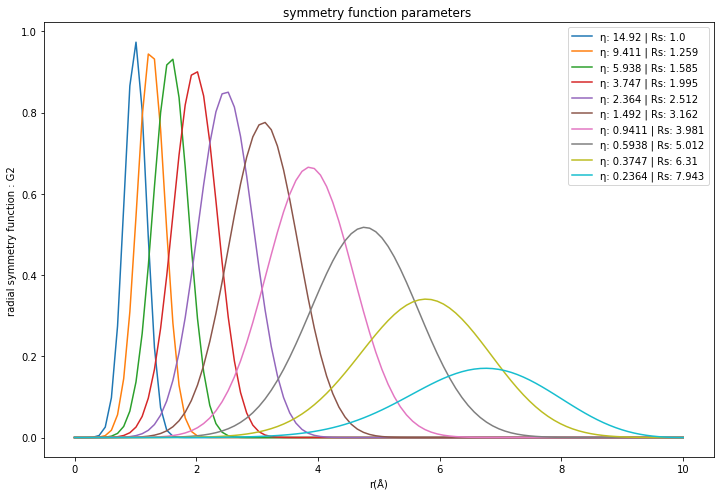

In [5]:
plot_sf(result, '')

In [6]:
from ase.io import read
import glob
import numpy as np
import os
from dscribe.descriptors import ACSF
import pandas as pd
import matplotlib.pyplot as plt

path2root = '/Users/y1u0d2/desktop/Lab/result/qe/Si/mp-149/coord/l_5.0/result'

dirs = glob.glob(f'{path2root}/scf*')
# df = pd.DataFrame(data=acsf_si, columns=['G1', 'G2_1', 'G2_2', 'G2_3'])

In [7]:
structure = read(os.path.join(dirs[0], 'scf.in'), format='espresso-in')

acsf = ACSF(
    species=["Si", "Si"],
    rcut=10,
    periodic=True,
    g2_params=params,
)
acsf_si = acsf.create(structure)

In [8]:
column_names = ['G1']
for i in params:
    name = f'eta_{i[0]}-eps_{i[1]}'
    column_names.append(name)

In [9]:
df = pd.DataFrame(data=acsf_si, columns=column_names)

In [10]:
df

,G1,eta_14.92-eps_1.0,eta_9.411-eps_1.259,eta_5.938-eps_1.585,eta_3.747-eps_1.995,eta_2.364-eps_2.512,eta_1.492-eps_3.162,eta_0.9411-eps_3.981,eta_0.5938-eps_5.012,eta_0.3747-eps_6.31,eta_0.2364-eps_7.943
0,51.574604,3.539922e-03,0.292802,1.166361,2.240297,4.806224,8.977318,14.896118,20.726889,25.463793,18.572323
1,51.437969,3.483675e-05,0.044612,0.655755,1.380836,4.343249,10.584864,16.397316,20.787289,24.452291,18.185619
2,51.555489,7.910600e-04,0.179825,1.587775,2.590183,3.426563,9.167059,15.752897,20.585827,25.282293,18.516962
3,51.644127,3.954720e-03,0.432978,2.467870,3.065417,2.867636,7.833445,15.381342,20.740713,25.703243,18.759569
4,51.566727,3.493013e-05,0.048662,1.117467,3.061885,4.050414,9.111945,15.243699,20.349392,25.600822,18.571301
5,51.514626,7.888858e-04,0.165729,1.100794,2.020547,3.980502,9.764972,15.857312,20.857811,24.854233,18.370874
6,51.450527,4.126489e-04,0.126485,0.837771,1.156249,4.174819,10.513452,16.585678,20.963854,24.291162,18.162571
7,51.510231,1.190366e-07,0.004455,0.484171,2.341278,4.793402,9.937884,15.280115,20.734200,25.048916,18.379581
